_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

#Use the following Instacart data to answer the assignment questions.

In [1]:
#!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz 

# Make sure we're in the top-level /content directory
#
# See below for notes on the cd command and why it's %cd instead of !cd
%cd /content

# Remove everything in the current working directory
#
# rm is the remove command
# -rf specifies the "recursive" and "force" options to remove all files in 
# subdirectories without prompting
#
# THIS IS A POWERFUL COMMAND!
#
# In this particular case, removing all of the files makes things easier if you
# need to re-run these examples by allowing you start with a clean directory
# every time.
!rm -rf *

# wget retrieves files from a remote location
!wget https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip

/content
--2020-12-02 21:29:26--  https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip [following]
--2020-12-02 21:29:26--  https://www.dropbox.com/s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc40a739a49d8d37829dbd41e071.dl.dropboxusercontent.com/cd/0/inline/BEWeNr5hqGPbSBTzm7Ug3s_6wlFOjNNbBI31nzETEzJABIY4H3Qn68M1TeYem53Ha_vFFMLWuXXoYKUxwVCKFoxbdu5ql1FIfZz_sBFoK7ktNxoEKeuom8vrUHO_LPY9STQ/file# [following]
--2020-12-02 21:29:27--  https://uc40a739a49d8d37829dbd41e071.dl.dropboxusercontent.com/cd/0/inline/BEWeNr5hqGPbSBTzm7Ug3s_6wlFOjNNbB

In [2]:
# Unzip the archive
#
# Creates a new directory called instacart-market-basket-analysis

!unzip instacart-market-basket-analysis.zip

Archive:  instacart-market-basket-analysis.zip
   creating: instacart-market-basket-analysis/
  inflating: __MACOSX/._instacart-market-basket-analysis  
  inflating: instacart-market-basket-analysis/order_products__prior.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._order_products__prior.csv.zip  
  inflating: instacart-market-basket-analysis/.DS_Store  
  inflating: __MACOSX/instacart-market-basket-analysis/._.DS_Store  
  inflating: instacart-market-basket-analysis/order_products__train.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._order_products__train.csv.zip  
  inflating: instacart-market-basket-analysis/aisles.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._aisles.csv.zip  
  inflating: instacart-market-basket-analysis/orders.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._orders.csv.zip  
  inflating: instacart-market-basket-analysis/departments.csv.zip  
  inflating: __MACOSX/instacart-market-baske

In [3]:
# Change into the newly-unzipped directory
#
# % sign is required to change to a new directory -- you can't use !cd like
# other commands
#
# Optional technical details:
#
# % makes the command apply to the **entire notebook environment**, which is
# what you need to do to change the working directory
#
# The ! sign **opens a new shell process** behind the scenes to execute the
# command -- this works fine for regular commands like unzip and ls
#
# Therefore, !cd would apply only to that new shell and wouldn't change the
# global notebook environment
#
# If this makes your heard hurt, don't worry too much about it. We'll talk
# more about the shell and operating systems stuff later in the program.

%cd instacart-market-basket-analysis

/content/instacart-market-basket-analysis


In [4]:
# Unzip all .csv.zip files in the directory
!unzip "*.zip"

Archive:  products.csv.zip
  inflating: products.csv            
   creating: __MACOSX/
  inflating: __MACOSX/._products.csv  

Archive:  departments.csv.zip
  inflating: departments.csv         
  inflating: __MACOSX/._departments.csv  

Archive:  orders.csv.zip
  inflating: orders.csv              
  inflating: __MACOSX/._orders.csv   

Archive:  aisles.csv.zip
  inflating: aisles.csv              
  inflating: __MACOSX/._aisles.csv   

Archive:  order_products__train.csv.zip
  inflating: order_products__train.csv  
  inflating: __MACOSX/._order_products__train.csv  

Archive:  order_products__prior.csv.zip
  inflating: order_products__prior.csv  
  inflating: __MACOSX/._order_products__prior.csv  

6 archives were successfully processed.


In [5]:
# List all csv files in the current directory
# -l specifies the "long" listing format, which includes additional info on each file
# -h specifies "human readable" file size units
!ls -l -h *.csv

-rw-r--r-- 1 root root 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 root root  270 May  2  2017 departments.csv
-rw-r--r-- 1 root root 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 root root  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 root root 104M May  2  2017 orders.csv
-rw-r--r-- 1 root root 2.1M May  2  2017 products.csv


#Use the follwing information to answer the assignment questions.

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

1) Save the products.csv file as a data frame called product_names.  Print the first 5 rows of product_names.

In [7]:
import pandas as pd
import numpy as np
product_namesdf = pd.read_csv('products.csv')
product_namesdf.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


2) Read in order_products_prior.csv and order_products_train.csv.  Concatenate them into one dataset called order_product_link.

In [16]:
order_products_priordf = pd.read_csv('order_products__prior.csv')
order_products_traindf = pd.read_csv('order_products__train.csv')
order_product_linkdf = pd.concat([order_products_priordf, order_products_traindf])
order_product_linkdf.tail(10)

,order_id,product_id,add_to_cart_order,reordered
1384607,3421058,30316,6,1
1384608,3421058,35578,7,0
1384609,3421058,32650,8,1
1384610,3421063,49235,1,1
1384611,3421063,13565,2,1
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


3) Use the code below to identify the top 10 most ordered products. Clearly Instacart users really like avocados...

In [55]:
ten_products = ["Banana",
"Bag of Organic Bananas",
"Organic Strawberries",
"Organic Baby Spinach",
"Organic Hass Avocado",
"Organic Avocado",
"Large Lemon",
"Strawberries",
"Limes",
"Organic Whole Milk"]


# top_ordersdf = order_product_linkdf['product_id'].value_counts().head(15)
# # top_ordersdf.columns = ['product_id', 'number_times_ordered']
# top_ordersdf.head(15)





4) Create a subset of the product_names dataset that includes just the top 10 most ordered products.  Call that dataset product_names_10

In [51]:
top_10_condition = (product_namesdf['product_name'].isin(ten_products))
product_names_10 = product_namesdf[top_10_condition]
product_names_10

,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16
47208,47209,Organic Hass Avocado,24,4
47625,47626,Large Lemon,24,4
47765,47766,Organic Avocado,24,4


5) Merge the order_product_link dataset with the product_names_10 dataset and print the top 20 rows.  Call the new dataset product_orders.

In [56]:
product_orders = pd.merge(order_product_linkdf,product_names_10, on = 'product_id', how='inner')
product_orders.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,3,21903,4,1,Organic Baby Spinach,123,4
1,26,21903,6,0,Organic Baby Spinach,123,4
2,31,21903,3,1,Organic Baby Spinach,123,4
3,39,21903,4,0,Organic Baby Spinach,123,4
4,56,21903,8,1,Organic Baby Spinach,123,4
5,57,21903,1,0,Organic Baby Spinach,123,4
6,73,21903,4,1,Organic Baby Spinach,123,4
7,92,21903,2,1,Organic Baby Spinach,123,4
8,113,21903,4,0,Organic Baby Spinach,123,4
9,135,21903,5,1,Organic Baby Spinach,123,4


6) Note that every record product_orders dataset is a single instance in which someone ordered one of the top 10 products.  

Calcluate the number of times each product was ordered.  What was the most frequently ordered food?

In [57]:
product_orders['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

#Now we want to figure out when people are ordering all these bananas.


7) Import orders.csv and name the dataset "orders".  Print the top 5 observations in orders.



In [58]:
orders = pd.read_csv('orders.csv')
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


8) Merge the orders dataset and the product_orders dataset so we can see the time each order of each of the top 10 products was placed.

In [69]:
orders2 = pd.merge(orders, product_orders)
orders2

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4
1,431534,1,prior,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,24,4
2,1187899,1,train,11,4,8,14.0,27845,9,0,Organic Whole Milk,84,16
3,2168274,2,prior,1,2,11,NaN,13176,12,0,Bag of Organic Bananas,24,4
4,2168274,2,prior,1,2,11,NaN,47766,2,0,Organic Avocado,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418309,1854736,206209,prior,11,4,10,30.0,24852,4,1,Banana,24,4
2418310,626363,206209,prior,12,1,12,18.0,24852,2,1,Banana,24,4
2418311,626363,206209,prior,12,1,12,18.0,26209,8,0,Limes,24,4
2418312,2977660,206209,prior,13,1,12,7.0,24852,1,1,Banana,24,4


9) Create a subset of order_times that includes only orders of Bananas.  Call that dataset Bananas.

In [71]:
condition = (orders2['product_id'] == 24852)
bananas = orders2[condition]
bananas




,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
9,738281,2,prior,4,2,10,8.0,24852,8,0,Banana,24,4
12,1199898,2,prior,6,2,9,13.0,24852,7,1,Banana,24,4
14,3194192,2,prior,7,2,12,14.0,24852,8,1,Banana,24,4
16,788338,2,prior,8,1,15,27.0,24852,3,1,Banana,24,4
17,1718559,2,prior,9,2,9,8.0,24852,2,1,Banana,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418308,2266710,206209,prior,10,5,18,29.0,24852,7,0,Banana,24,4
2418309,1854736,206209,prior,11,4,10,30.0,24852,4,1,Banana,24,4
2418310,626363,206209,prior,12,1,12,18.0,24852,2,1,Banana,24,4
2418312,2977660,206209,prior,13,1,12,7.0,24852,1,1,Banana,24,4


10) Run the following code to show a histogram of the times of banana orders (times after noon are written as 13 hours, 14 hours, etc.)

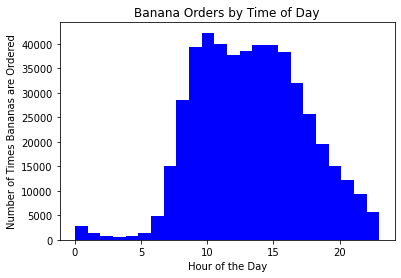

In [72]:
import matplotlib.pyplot as plt

plt.hist(bananas['order_hour_of_day'],bins=24, color='blue')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Times Bananas are Ordered')
plt.title('Banana Orders by Time of Day')

plt.show()

11) When were bananas most frequently ordered?

10-15 hours military

12) Were avocados ordered at a different time a day?  Modify the code below by replacing the ??? to create a histogram of order times of Organic Haas Avocados.

In [73]:
#Calculate mean order times by product

Haas_avocado = order_times.loc[order_times['product_name'] == '????????']


import matplotlib.pyplot as plt

plt.hist(Haas_avocado['order_hour_of_day'],bins=24, color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Times ?????????? are Ordered')
plt.title('???????????? Orders by Time of Day')

plt.show()

NameError: ignored

Answer here: 

# Portfolio Project Milestone

Watch the Showcase Project (formerly known as Build Week) kickoff video to get a sense of what you will accomplish over the next few weeks:
https://youtu.be/WYi9EXH-9lU